# TASK 1: Prediction Using Supervised Machine Learning 

## Author: Sumit Bajare

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Loading the data 
url = "http://bit.ly/w-data"
linear = pd.read_csv(url)
linear.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
linear.shape

(25, 2)

In [5]:
linear.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Lets check if there is any null values
linear.isna().sum()
# There are no null values

Hours     0
Scores    0
dtype: int64

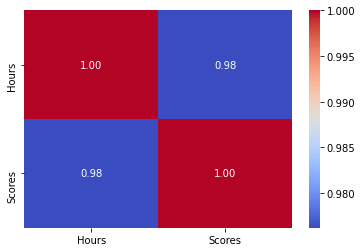

In [8]:
# Find the correlation 
sns.heatmap(linear.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

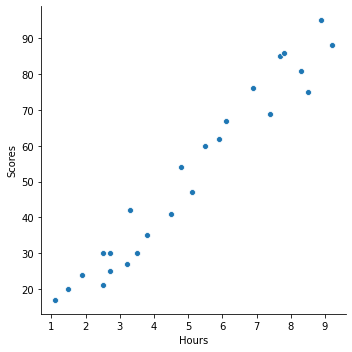

In [9]:
# We Can clearly see as the no of hours increases the scores automatically increases 
sns.relplot(x='Hours',y='Scores',data=linear)

In [10]:
# Lets split into independent and dependent Varibles 
X = linear.drop('Scores',axis=1)
y = linear['Scores']

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [11]:
# Split into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.20, random_state=0)


In [12]:
# Lets do cross validation with R-Squared as the scoring parameter 
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [13]:
# We can find the accuarcy is 93 percent 
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.931519532008859
STD:  0.022415030387883273




### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [29]:
y_pred = lr.predict(X_test)

In [30]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [31]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

In [32]:
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


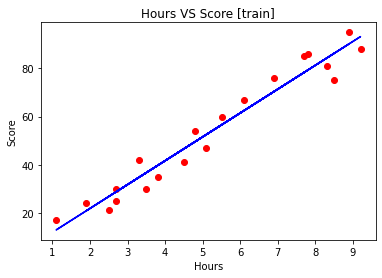

In [33]:
#visualsing the trainig set result 
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train ,lr.predict(X_train),color = 'blue')
plt.title('Hours VS Score [train]')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [34]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
own_pred = lr.predict(np.array([hours]).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Thank you 